# Importing 

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

In [2]:
#imports
#numpy,pandas,scipy, math, matplotlib
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt
from matplotlib import pyplot
from numpy import where
from sqlalchemy import create_engine
import pymysql
from matplotlib import pyplot as plt
import plotly.express as px
import ydata_profiling
import seaborn as sns
from scipy.stats import pearsonr
import scipy.stats as stats
import scipy as sp
#estimators
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.metrics import accuracy_score, classification_report
#model metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
#cross validation
from sklearn.model_selection import train_test_split 
#Resampling
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE

In [3]:
connection = pymysql.connect(host='data-analytics-2018.cbrosir2cswx.us-east-1.rds.amazonaws.com', 
                             user='deepAnalytics',
                            password = 'Sqltask1234!',
                            database = 'Credit',
                            charset = 'utf8mb4',
                            cursorclass = pymysql.cursors.DictCursor)
#Import df
df = pd.read_sql('SELECT * FROM credit', con = connection)

In [4]:
# checking for duplicate rows
df_dupes = df[df.duplicated()]

#Dropping duplicate rows and removing row 0 which has column headings as data
df_2 = df.drop_duplicates()
df_2.columns = df_2.iloc[0]
df_3 = df_2.drop([0])

#Changing strings to integer values for Default
df_3["default payment next month"] = df_3["default payment next month"].replace({"default": 1,
                              "not default": 0})

#Categorising columns for box plot use.
df_3['MARRIAGE'] = df_3['MARRIAGE'].replace({str(1): 'married', str(2): 'single', str(3) :'divorce', str(0):'others'})

#Changing the varible types for the columns
cols_float = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'BILL_AMT6','PAY_AMT1', 'PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']
cols_int = ['LIMIT_BAL','AGE', 'PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']
cols_cat = ['SEX','MARRIAGE', 'EDUCATION']
df_3[cols_float] = df_3[cols_float].astype(float)
df_3[cols_int] = df_3[cols_int].astype(int)
df_3['default payment next month'] = df_3['default payment next month'].astype(bool) 
df_3[cols_cat] = df_3[cols_cat].astype('category') 

Creating a new dataframe to categorise age into generations, and brackets for their credit limit. We can also split the dataset into two; for clients who have and have not defaulted to see what insights this can bring us.

In [5]:
#Renaming DB
credit = df_3.copy()

#Creating a generation column
credit['Generation'] = pd.cut(x = credit['AGE'], bins = [17,26,42,58,77,86], labels = ['Gen Z', 'Millennial', 'Gen X','Baby Boomer','The Silent Generation'])

#Splitting dataset into default customers and non default customers
credit_defaults = credit[credit['default payment next month'] == 1]
credit_non_defaults = credit[credit['default payment next month'] == 0]

#Splitting limit balance data into default and non-defaulting customers
default_limit_bal = credit_defaults['LIMIT_BAL']
non_default_limit_bal =credit_non_defaults['LIMIT_BAL']

bin_labels_limit = ['10,000 - 29,999', '30,000 - 49,999','50,000 - 69,999', '70,000 - 99,999', 
                    '100,000 - 139,999', '140,000 - 179,999', '180,000 - 209,999', '210,000 - 259,999',
                    '260,000 - 359,999', '360,000 - 1,000,000']
credit['limit'] = pd.qcut(credit['LIMIT_BAL'],q=10,labels = bin_labels_limit)

In [6]:
#Creating a dictionary to relabel the numbers to categorys for easier understanding
repayment_dict = {-2:'No consumption',
                                                   -1:'Paid in full',
                                                     0:'The use of revolving credit',
                                                    1:'One month payment delay',
                                                    2:'Two month payment delay',
                                                    3:'Three month payment delay',
                                                    4:'Four month payment delay',
                                                    5:'Five month payment delay',
                                                    6:'Six month payment delay',
                                                    7:'Seven month payment delay',
                                                    8: 'Eight month payment delay',
                                                    9: 'Nine '}

#Creating a new DF with columns renamed
credit_new = credit.copy()

#Renaming columns
credit_new['Repayment September'] = credit_new['PAY_0'].replace(repayment_dict)
credit_new['Repayment August'] = credit_new['PAY_2'].replace(repayment_dict)
credit_new['Repayment July'] = credit_new['PAY_3'].replace(repayment_dict)
credit_new['Repayment June'] = credit_new['PAY_4'].replace(repayment_dict)
credit_new['Repayment May'] = credit_new['PAY_5'].replace(repayment_dict)
credit_new['Repayment April'] = credit_new['PAY_6'].replace(repayment_dict)

#Renaming columns
credit_new['Bill September'] = credit_new['BILL_AMT1']
credit_new['Bill August'] = credit_new['BILL_AMT2']
credit_new['Bill July'] = credit_new['BILL_AMT3']
credit_new['Bill June'] = credit_new['BILL_AMT4']
credit_new['Bill May'] = credit_new['BILL_AMT5']
credit_new['Bill April'] = credit_new['BILL_AMT6']

#Renaming columns 
credit_new['Paid September'] = credit_new['PAY_AMT1']
credit_new['Paid August'] = credit_new['PAY_AMT2']
credit_new['Paid July'] = credit_new['PAY_AMT3']
credit_new['Paid June'] = credit_new['PAY_AMT4']
credit_new['Paid May'] = credit_new['PAY_AMT5']
credit_new['Paid April'] = credit_new['PAY_AMT6']

#Dropping old columns
credit_new = credit_new.drop(columns =[ 'PAY_0', 'PAY_2','PAY_3', 'PAY_4', 'PAY_5', 'PAY_6','BILL_AMT1', 'BILL_AMT2','BILL_AMT3',
                                       'BILL_AMT4','BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
                                      'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'])
#Default vs non default datasets
credit_new_defaults = credit_new[credit_new['default payment next month'] == 1]
credit_new_non_defaults = credit_new[credit_new['default payment next month'] == 0]

#Work out the average repayment for each customer
credit_new['Average monthly repayment'] = (credit_new['Paid April'] +credit_new['Paid May'] + credit_new['Paid June']+
                                        credit_new['Paid July'] +credit_new['Paid August']  + credit_new['Paid September'])/6   

#Work out the monthly consumption for each customer
credit_new['April consumption'] = credit_new['Bill May'] - (credit_new['Bill April'] - credit_new['Paid May'])
credit_new['May consumption'] = credit_new['Bill June'] - (credit_new['Bill May'] - credit_new['Paid June'])
credit_new['June consumption'] = credit_new['Bill July'] - (credit_new['Bill June'] - credit_new['Paid July'])
credit_new['July consumption'] = credit_new['Bill August'] - (credit_new['Bill July'] - credit_new['Paid August'])
credit_new['August consumption'] = credit_new['Bill September'] - (credit_new['Bill August'] - credit_new['Paid September'])

#Work out the average monthly consumption for each customer

total_consump = (credit_new['April consumption']+credit_new['May consumption']+ credit_new['June consumption']+credit_new['July consumption']+
                 credit_new['August consumption'])
credit_new['Average monthly consumption'] = total_consump/5

#Define a function to work out how long it will take a client to repay (if they can)

def months_to_repay(bill, avg_repayment, avg_consump):
    if avg_consump < 0:
        return 'Negative consumption'
    if avg_repayment > avg_consump >= 0:
        return bill/(avg_repayment - avg_consump)
    if avg_repayment == avg_consump:
        return 'Repayment equal to consumption, need to reduce consumption or increase repayment'
    if avg_repayment < avg_consump:
        return 'Repayment less than consumption, need to reduce consumption or increase repayment'
#Creating a list of all clients with negative consumption    
neg_consumption = credit_new[credit_new['Average monthly consumption']< 0]

#Formatting DF to get rid of clients with negative consumption (i.e paying back more than they are spending)
credit_new = credit_new.merge(neg_consumption, how = 'left', indicator = True)
credit_new = credit_new[credit_new['_merge'] == 'left_only']
credit_new = credit_new.drop(columns = ['_merge'])

#Working out how many months until a client can repay their bill
credit_new['Months to repayment'] = credit_new.apply(lambda row: months_to_repay(row['Bill September'], row['Average monthly repayment'],row['Average monthly consumption']), axis=1)

We have now worked out how long it would take a client to pay back their debts based on their average monthly consumption and average monthly repayment. We will now categorise the customers as to whether their debts are repayable (at their current rate) in the next 12 months.

In [8]:
#change num months for repayment threshold, currently at 12 months
payback_possible = []
for num_months in credit_new['Months to repayment']:
    if type(num_months) == int or type(num_months) == float :
        if num_months <=12:
            payback_possible.append(True)
        if num_months >12:
            payback_possible.append(False)
    if type(num_months) == str:
        payback_possible.append(False)
credit_new['Payback possible'] = payback_possible 

#Creating seperate Datasets for clients who have been categorised as defaulting next month
df_default = credit_new[credit_new['default payment next month'] == True]
df_non_default = credit_new[credit_new['default payment next month'] == False]

#Filting those clients that will default next month  on whether they can payback in 12 months
df_default_payback_possible = df_default[df_default['Payback possible'] == True]
df_default_payback_not_possible = df_default[df_default['Payback possible'] == False]

# How to resolve solvency issue

The below section will address how to resolve the short term issues the company faces, solvency.
If the company continues as it is, it will become insolvent very quickly, here are our ideas to address this pressing issue.

## How to deal with defaulting customers

### Customers who can pay back within 12 months at current consumption rates

We have 63 clients who are defaulting but can payback their debts at their current consumption rate.
Given these customers have defaulted, we can impose limit on their consumption which would reduce their debt quicker. This would clear $ 320K of debt.

In [56]:
less_6_month_payback = df_default_payback_possible[df_default_payback_possible['Months to repayment'] < 6]
more_6_month_payback = df_default_payback_possible[df_default_payback_possible['Months to repayment'] >= 6]

In [52]:
print("There are " + str(df_default_payback_possible['Bill September'].count()) + " customers who can payback their debts in 12 months at current rates. They will clear $"+
      str(df_default_payback_possible['Bill September'].sum()) + " of debt.")

There are 63 customers who can payback their debts in 12 months at current rates. They will clear $317555.0 of debt.


In [55]:
print("There are " + str(less_6_month_payback['Bill September'].count()) + " customers who can payback their debts in less than 6 months at current rates. They will clear $"+
      str(less_6_month_payback['Bill September'].sum()) + " of debt.")

There are 42 customers who can payback their debts in less than 6 months at current rates. They will clear $47726.0 of debt.


In [54]:
print("There are " + str(more_6_month_payback['Bill September'].count()) + " customers who can payback their debts in more than 6 months at current rates. They will clear $"+
      str(more_6_month_payback['Bill September'].sum()) + " of debt.")

There are 21 customers who can payback their debts in more than 6 months at current rates. They will clear $269829.0 of debt.


### Customers who cannot pay back within 12 months at current consumption rate

#### Changing consumption to 0

Here we look into the 455 defaulting customers cannot payback their debts within 12 months.

We explore a hypothetical scenario where we insist that the customers cannot spend any more many (consumption goes to 0), and they repay their debt at the same as their current monthly average.
The total debt of this group is $26M.

In [13]:
df_default_payback_not_possible['Bill September'].sum()

26260348.0

In [14]:
#If we reduce consumption to 0 (put a ban on spending)
df_default_payback_not_possible['Months to repayment no consump']=df_default_payback_not_possible['Bill September']/df_default_payback_not_possible['Average monthly repayment']
df_default_payback_not_possible['Months to repayment no consump'] = df_default_payback_not_possible['Months to repayment no consump'].fillna(0)

#Finding the largest number of months it will take to repay
max_value = np.nanmax(df_default_payback_not_possible['Months to repayment no consump'][df_default_payback_not_possible['Months to repayment no consump'] != np.inf])

#Replacing negative infinite values with 0 
df_default_payback_not_possible['Months to repayment no consump'].replace(-np.inf, 0, inplace = True)
#Replacing +infinite values with the max number
df_default_payback_not_possible['Months to repayment no consump'].replace(np.inf, max_value, inplace = True)

#Our list of clients who can and cant payback within 12 months
less_12_month_payback_zero_consump = df_default_payback_not_possible[df_default_payback_not_possible['Months to repayment no consump'] < 12]
more_12_month_payback_zero_consump = df_default_payback_not_possible[df_default_payback_not_possible['Months to repayment no consump'] >= 12]

<ipython-input-14-802b5adddb91>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_default_payback_not_possible['Months to repayment no consump']=df_default_payback_not_possible['Bill September']/df_default_payback_not_possible['Average monthly repayment']
<ipython-input-14-802b5adddb91>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_default_payback_not_possible['Months to repayment no consump'] = df_default_payback_not_possible['Months to repayment no consump'].fillna(0)
C:\Users\domsi\anaconda3\lib\

Out of the 455 original customers who could not pay back within 12 months at their current consumption rate, 171 customers would be able to payback within 12 months if we reduced their consumption to 0 and they repaid at their current monthly repayment. This would resolve $ 3.2M of debt. 

In [15]:
less_12_month_payback_zero_consump['Bill September'].sum()

3275512.0

In [16]:
less_12_month_payback_zero_consump.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,default payment next month,Generation,limit,Repayment September,Repayment August,...,Average monthly repayment,April consumption,May consumption,June consumption,July consumption,August consumption,Average monthly consumption,Months to repayment,Payback possible,Months to repayment no consump
21,120000,female,university,married,39,True,Millennial,"100,000 - 139,999",Paid in full,Paid in full,...,263.333333,632.0,0.0,316.0,316.0,316.0,316.0,"Repayment less than consumption, need to reduc...",False,1.200000
23,450000,female,graduate school,married,40,True,Millennial,"360,000 - 1,000,000",No consumption,No consumption,...,3764.833333,0.0,560.0,1473.0,19420.0,5520.0,5394.6,"Repayment less than consumption, need to reduc...",False,1.464075
38,50000,male,graduate school,single,25,True,Gen Z,"30,000 - 49,999",One month payment delay,Paid in full,...,130.000000,0.0,0.0,0.0,780.0,0.0,156.0,"Repayment less than consumption, need to reduc...",False,0.000000
45,210000,male,graduate school,single,29,True,Millennial,"180,000 - 209,999",No consumption,No consumption,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,"Repayment equal to consumption, need to reduce...",False,0.000000
46,20000,female,graduate school,single,22,True,Gen Z,"10,000 - 29,999",The use of revolving credit,The use of revolving credit,...,3345.833333,16675.0,0.0,16200.0,684.0,544.0,6820.6,"Repayment less than consumption, need to reduc...",False,4.192677


Below we have a list of the remaining 284 out of 455 customers who cannot pay back in 12 months even with 0 consumption. This group is responsible for $ 23M of debt. We explore options for customers in the next section.

In [17]:
more_12_month_payback_zero_consump['Bill September'].sum()

22984836.0

In [18]:
more_12_month_payback_zero_consump.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,default payment next month,Generation,limit,Repayment September,Repayment August,...,Average monthly repayment,April consumption,May consumption,June consumption,July consumption,August consumption,Average monthly consumption,Months to repayment,Payback possible,Months to repayment no consump
0,20000,female,university,married,24,True,Gen Z,"10,000 - 29,999",Two month payment delay,Two month payment delay,...,114.833333,0.0,0.0,689.0,3102.0,811.0,920.4,"Repayment less than consumption, need to reduc...",False,34.075472
13,70000,male,university,single,30,True,Millennial,"50,000 - 69,999",One month payment delay,Two month payment delay,...,1783.333333,743.0,33645.0,1919.0,1668.0,1633.0,7921.6,"Repayment less than consumption, need to reduc...",False,36.898318
16,20000,male,graduate school,single,24,True,Gen Z,"10,000 - 29,999",The use of revolving credit,The use of revolving credit,...,1058.333333,451.0,433.0,590.0,582.0,566.0,524.4,28.7976,False,14.528504
22,70000,female,university,single,26,True,Gen Z,"50,000 - 69,999",Two month payment delay,The use of revolving credit,...,1835.000000,893.0,702.0,1014.0,1007.0,649.0,853.0,41.8401,False,22.390736
31,50000,male,university,single,33,True,Millennial,"30,000 - 49,999",Two month payment delay,The use of revolving credit,...,1155.666667,537.0,517.0,368.0,9016.0,2618.0,2611.2,"Repayment less than consumption, need to reduc...",False,26.407269


#### Consumption to 0 and double repayment amount

In an extreme hypothetical scenario, we can check to see what effect  doubling their repayment while keeping their consumption as 0 would have. We have 284 customers in this bracket ($ 23M).

In [19]:
more_12_month_payback_zero_consump_double_repayment = more_12_month_payback_zero_consump
more_12_month_payback_zero_consump_double_repayment['Average monthly repayment'] = more_12_month_payback_zero_consump_double_repayment['Average monthly repayment']*2

#Possible & not possible groups
more_12_month_payback_zero_consump_double_repayment_possible = more_12_month_payback_zero_consump_double_repayment[more_12_month_payback_zero_consump_double_repayment['Months to repayment no consump'] < 12]
more_12_month_payback_zero_consump_double_repayment_impossible = more_12_month_payback_zero_consump_double_repayment[more_12_month_payback_zero_consump_double_repayment['Months to repayment no consump'] >= 12]

<ipython-input-19-2e0af0857ef7>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  more_12_month_payback_zero_consump_double_repayment['Average monthly repayment'] = more_12_month_payback_zero_consump_double_repayment['Average monthly repayment']*2


Doubling the repayment while keeping the consumption at 0 has no effect. Legal proceedings should follow for the below list of 284 customers, with those first on the list the priority clients with the highest debts.
The top 60 of these clients are responsible for $ 23M of debt. They should be prioritised.

In [20]:
#customers we should follow legal preceedings with
legal_customers = more_12_month_payback_zero_consump.sort_values(by = ['Bill September'], ascending=False).head(60)
legal_customers.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,default payment next month,Generation,limit,Repayment September,Repayment August,...,Average monthly repayment,April consumption,May consumption,June consumption,July consumption,August consumption,Average monthly consumption,Months to repayment,Payback possible,Months to repayment no consump
360,500000,female,university,single,23,True,Gen Z,"360,000 - 1,000,000",Four month payment delay,Three month payment delay,...,25166.666667,80969.0,37395.0,8429.0,9293.0,8497.0,28916.6,"Repayment less than consumption, need to reduc...",False,40.349086
451,600000,male,graduate school,married,53,True,Gen X,"360,000 - 1,000,000",Two month payment delay,Two month payment delay,...,30333.333333,27267.0,22148.0,38573.0,7159.0,8288.0,20687.0,"Repayment less than consumption, need to reduc...",False,30.801099
1826,260000,female,university,married,35,True,Millennial,"210,000 - 259,999",The use of revolving credit,The use of revolving credit,...,19036.666667,42308.0,203431.0,5373.0,5744.0,3823.0,52135.8,"Repayment less than consumption, need to reduc...",False,44.687340
1496,360000,female,university,single,35,True,Millennial,"260,000 - 359,999",Two month payment delay,Two month payment delay,...,21418.666667,65764.0,69020.0,42556.0,13055.0,11477.0,40374.4,"Repayment less than consumption, need to reduc...",False,33.617686
470,390000,female,high school,single,35,True,Millennial,"360,000 - 1,000,000",The use of revolving credit,The use of revolving credit,...,22628.000000,4478.0,3928.0,129879.0,6669.0,5692.0,30129.2,"Repayment less than consumption, need to reduc...",False,31.396058


## Non-defaulting customers

For non-defaulting customers, we will highlight the customers of concern to change their credit limits.

In [21]:
cut_bins = [0,50000, 100000, 150000, 200000, 250000,1000000]
df_non_default['Debt bracket'] = pd.cut(df_non_default['Bill September'], bins=cut_bins)

<ipython-input-21-bd9599ca0a88>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_non_default['Debt bracket'] = pd.cut(df_non_default['Bill September'], bins=cut_bins)


In [22]:
print("Number of non defaulting customers in each credit limit bracket")

df_non_default.groupby(['Debt bracket'])['Debt bracket'].count()

Number of non defaulting customers in each credit limit bracket


Debt bracket
(0, 50000]           1144
(50000, 100000]       279
(100000, 150000]      137
(150000, 200000]       74
(200000, 250000]       31
(250000, 1000000]      56
Name: Debt bracket, dtype: int64

In [23]:
print("Amount of debt of non defaulting customers in each credit limit bracket")

df_non_default.groupby(['Debt bracket'])['Bill September'].sum()

Amount of debt of non defaulting customers in each credit limit bracket


Debt bracket
(0, 50000]           18794867.0
(50000, 100000]      19915195.0
(100000, 150000]     16726952.0
(150000, 200000]     12945232.0
(200000, 250000]      6917247.0
(250000, 1000000]    20261560.0
Name: Bill September, dtype: float64

For the purposes of the below, we will ignore clients with an outstanding bill of over 200k.
A lot of these clients have had debt interventions by the company already.

In [24]:
#Customers over and under 200k of debt
df_non_default_bill_under_200k = df_non_default[df_non_default['Bill September']<=200000]
df_non_default_bill_over_200k = df_non_default[df_non_default['Bill September']>200000]

#payback possible
df_non_default_bill_under_200k_possible = df_non_default_bill_under_200k[df_non_default_bill_under_200k['Payback possible'] == True]
df_non_default_bill_under_200k_not_possible = df_non_default_bill_under_200k[df_non_default_bill_under_200k['Payback possible'] == False]

### Customers who can payback within 12 months

As we see below, the below list of people can repay within 12 months. These 329 customers are not of concern, their total debt amounts to $ 2.3M and continuing their current spending habits will lead to their debt clearing within 12 months (based on our earlier assumptions).

In [25]:
df_non_default_bill_under_200k_possible.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,default payment next month,Generation,limit,Repayment September,Repayment August,...,Average monthly repayment,April consumption,May consumption,June consumption,July consumption,August consumption,Average monthly consumption,Months to repayment,Payback possible,Debt bracket
9,20000,male,high school,single,35,False,Millennial,"10,000 - 29,999",No consumption,No consumption,...,2354.833333,217.0,0.0,0.0,0.0,0.0,43.4,0,True,NaN
24,90000,male,graduate school,single,23,False,Gen Z,"70,000 - 99,999",The use of revolving credit,The use of revolving credit,...,2733.333333,113.0,238.0,0.0,7070.0,3431.0,2170.4,8.42729,True,"(0.0, 50000.0]"
33,500000,female,university,married,54,False,Gen X,"360,000 - 1,000,000",No consumption,No consumption,...,26417.000000,63439.0,7521.0,22722.0,4257.0,10929.0,21773.6,2.35366,True,"(0.0, 50000.0]"
39,280000,male,graduate school,single,31,False,Millennial,"260,000 - 359,999",Paid in full,Paid in full,...,6226.166667,18024.0,0.0,4641.0,4434.0,498.0,5519.4,0.704617,True,"(0.0, 50000.0]"
42,10000,male,university,single,22,False,Gen Z,"10,000 - 29,999",The use of revolving credit,The use of revolving credit,...,1204.500000,219.0,206.0,3427.0,108.0,193.0,830.6,5.02006,True,"(0.0, 50000.0]"


In [26]:
df_non_default_bill_under_200k_possible['Bill September'].sum()

2311792.0

### Customers who cannot pay back within 12 months

This is where the bulk of the company debt is:

In [27]:
df_non_default_bill_under_200k_not_possible.groupby(['Debt bracket'])['Bill September'].sum()

Debt bracket
(0, 50000]           17022409.0
(50000, 100000]      19478120.0
(100000, 150000]     16616535.0
(150000, 200000]     12945232.0
(200000, 250000]            0.0
(250000, 1000000]           0.0
Name: Bill September, dtype: float64

There are multiple hypothetical scenarios on how to proceed with these clients; reducing their consumption limits, increasing their payback rates, or revaluating their current credit limits with our model as shown in the next section.

# Predictive modelling

## Classification model to predict whether a customer is likely to default or not next month

We will be creating a model to predict whether a client is likely to default or not based on their demographics.

In [28]:
credit_new_models = credit_new.copy()

SEX_dict = {'female': 0,
           'male':1}
EDUCATION_dict = {'other' : 0,
                  'graduate school' : 1,
                  'university' :2,
                  'high school' : 3}
MARRIAGE_dict = {'others' : 0,
                 'married' : 1,
                 'single' : 2,        
                 'divorce' : 3}
  
credit_new_models['SEX'] = credit_new_models['SEX'].replace(SEX_dict)
credit_new_models['SEX'] = credit_new_models['SEX'].astype('category')

credit_new_models['EDUCATION'] = credit_new_models['EDUCATION'].replace(EDUCATION_dict)
credit_new_models['EDUCATION'] = credit_new_models['EDUCATION'].astype('category')

credit_new_models['MARRIAGE'] = credit_new_models['MARRIAGE'].replace(MARRIAGE_dict)
credit_new_models['MARRIAGE'] = credit_new_models['MARRIAGE'].astype('category')

#### Model 1: Using only Age and Credit limit independant variables

We have an imbalanced dataset here with 1874 non-defaulting customers and 518 defaulting. I will resample the dataset:

In [29]:
#Defining our variables
indep_var_age_credlim = credit_new_models[['AGE', 'LIMIT_BAL']]
dep_var_default = credit_new_models['default payment next month']

#transforming the dataset to oversample
oversample = SMOTE()
indep_var_age_credlim, dep_var_default= oversample.fit_resample(indep_var_age_credlim,dep_var_default)

#Defining our classifying algorithms
algos_Class = []
algos_Class.append(('Random Forest Classifier',RandomForestClassifier()))
algos_Class.append(('Decision Tree Classifier', DecisionTreeClassifier()))
algos_Class.append(('Gradient Boosting Classifier', GradientBoostingClassifier()))

#Getting a cross validation score across all models
results = []
names = []
for name, model in algos_Class:
    result = cross_val_score(model, indep_var_age_credlim, dep_var_default, cv=3)
    names.append(name)
    results.append(result)

    #Print results
for i in range(len(names)):
    print(names[i],results[i].mean())

Random Forest Classifier 0.6219332799572991
Decision Tree Classifier 0.6091268748331998
Gradient Boosting Classifier 0.585381371764078


In [30]:
#Splitting data into train & test
indep_var_age_credlim_train, indep_var_age_credlim_test, dep_var_default_train, dep_var_default_test = train_test_split(indep_var_age_credlim, dep_var_default, test_size = .30, random_state = 123)

#Fitting best scoring model
algo_1 = RandomForestClassifier() 
model_1 = algo_1.fit(indep_var_age_credlim_train,dep_var_default_train)

#Predictions
prediction_default = model_1.predict(indep_var_age_credlim_test)

#Saving classification report to compare accuracies
class_report_model_1 = classification_report(dep_var_default_test, prediction_default, output_dict = True)

#Print results
print(classification_report(dep_var_default_test, prediction_default))

              precision    recall  f1-score   support

       False       0.62      0.54      0.58       570
        True       0.58      0.66      0.62       555

    accuracy                           0.60      1125
   macro avg       0.60      0.60      0.60      1125
weighted avg       0.60      0.60      0.60      1125



#### Model 2: Age, Credit limit, Education independant variables

In [31]:
#Define variables
indep_var_age_credlim_edu = credit_new_models[['AGE', 'LIMIT_BAL','EDUCATION']]
dep_var_default_2 = credit_new_models['default payment next month']

#Resolve imbalance in data
indep_var_age_credlim_edu, dep_var_default_2= oversample.fit_resample(indep_var_age_credlim_edu,dep_var_default_2)
#Get cross val score for each model
results_2 = []
names_2 = []
for name, model in algos_Class:
    result = cross_val_score(model, indep_var_age_credlim_edu, dep_var_default_2, cv=3)
    names_2.append(name)
    results_2.append(result)

#print results
for i in range(len(names)):
    print(names_2[i],results_2[i].mean())

Random Forest Classifier 0.6539529223378703
Decision Tree Classifier 0.6419454496930878
Gradient Boosting Classifier 0.5971247397918334


In [32]:
#test/train split
indep_var_age_credlim_edu_train, indep_var_age_credlim_edu_test, dep_var_default_2_train, dep_var_default_2_test = train_test_split(indep_var_age_credlim_edu, dep_var_default_2, test_size = .30, random_state = 123)

#Modeling (Classification) of
algo_2 = RandomForestClassifier() 
model_2 = algo_2.fit(indep_var_age_credlim_edu_train,dep_var_default_2_train)

#Predictions
prediction_default_2 = model_2.predict(indep_var_age_credlim_edu_test)

#record accuracy
class_report_model_2 = classification_report(dep_var_default_2_test, prediction_default_2, output_dict = True)

#print results
print(classification_report(dep_var_default_2_test, prediction_default_2))

              precision    recall  f1-score   support

       False       0.66      0.61      0.63       570
        True       0.62      0.67      0.65       555

    accuracy                           0.64      1125
   macro avg       0.64      0.64      0.64      1125
weighted avg       0.64      0.64      0.64      1125



#### Model 3: Age, Credit limit, Education, Marriage independant variables

In [33]:
#define variables
indep_var_age_credlim_edu_mar = credit_new_models[['AGE', 'LIMIT_BAL','EDUCATION','MARRIAGE']]
dep_var_default_3 = credit_new_models['default payment next month']

#rebalance sample sizes
indep_var_age_credlim_edu_mar, dep_var_default_3= oversample.fit_resample(indep_var_age_credlim_edu_mar,dep_var_default_3)

#Record cross val scores
results_3 = []
names_3 = []
for name, model in algos_Class:
    result = cross_val_score(model, indep_var_age_credlim_edu_mar, dep_var_default_3, cv=3)
    names_3.append(name)
    results_3.append(result)
 
#print results
for i in range(len(names)):
    print(names_3[i],results_3[i].mean())

Random Forest Classifier 0.681439871897518
Decision Tree Classifier 0.6643599679743796
Gradient Boosting Classifier 0.6248858286629303


In [34]:
#test/train split
indep_var_age_credlim_edu_mar_train, indep_var_age_credlim_edu_mar_test, dep_var_default_3_train, dep_var_default_3_test = train_test_split(indep_var_age_credlim_edu_mar, dep_var_default_3, test_size = .30, random_state = 123)

#fit model
algo_3 = RandomForestClassifier() 
model_3 = algo_3.fit(indep_var_age_credlim_edu_mar_train,dep_var_default_3_train)

#Predictions
prediction_default_3 = model_3.predict(indep_var_age_credlim_edu_mar_test)

#record accuracy
class_report_model_3 = classification_report(dep_var_default_3_test, prediction_default_3, output_dict = True)

#print results
print(classification_report(dep_var_default_3_test, prediction_default_3))

              precision    recall  f1-score   support

       False       0.70      0.61      0.65       570
        True       0.65      0.74      0.69       555

    accuracy                           0.67      1125
   macro avg       0.68      0.67      0.67      1125
weighted avg       0.68      0.67      0.67      1125



#### Model 4: Age, Credit limit, Education, Marriage, Sex independant variables

In [35]:
#reformat db
SEX_dict_2 = {False: 0,
           True:1}
credit_new_models['SEX'] = credit_new_models['SEX'].replace(SEX_dict_2)

#define variables
indep_var_age_credlim_edu_mar_sex = credit_new_models[['AGE', 'LIMIT_BAL','EDUCATION','MARRIAGE','SEX']]
dep_var_default_4 = credit_new_models['default payment next month']

#Resolve sample size discrepancies
indep_var_age_credlim_edu_mar_sex, dep_var_default_4= oversample.fit_resample(indep_var_age_credlim_edu_mar_sex,dep_var_default_4)

#record cross val scores 
results_4 = []
names_4 = []
for name, model in algos_Class:
    result = cross_val_score(model, indep_var_age_credlim_edu_mar_sex, dep_var_default_4, cv=3)
    names_4.append(name)
    results_4.append(result)

#Print results
for i in range(len(names)):
    print(names_4[i],results_4[i].mean())

Random Forest Classifier 0.6929178542834268
Decision Tree Classifier 0.6729014144649054
Gradient Boosting Classifier 0.6472994929276754


In [36]:
#test/train split
indep_var_age_credlim_edu_mar_sex_train, indep_var_age_credlim_edu_mar_sex_test, dep_var_default_4_train, dep_var_default_4_test = train_test_split(indep_var_age_credlim_edu_mar_sex, dep_var_default_4, test_size = .30, random_state = 123)

#fit model
algo_4 = RandomForestClassifier() 
model_4 = algo_4.fit(indep_var_age_credlim_edu_mar_sex_train,dep_var_default_4_train)

#Predictions
prediction_default_4 = model_4.predict(indep_var_age_credlim_edu_mar_sex_test)

#Record results
class_report_model_4 = classification_report(dep_var_default_4_test, prediction_default_4, output_dict = True)

#print results
print(classification_report(dep_var_default_4_test, prediction_default_4))

              precision    recall  f1-score   support

       False       0.69      0.68      0.68       570
        True       0.67      0.69      0.68       555

    accuracy                           0.68      1125
   macro avg       0.68      0.68      0.68      1125
weighted avg       0.68      0.68      0.68      1125



#### Conclusion

As the below table shows, our model 4 using the Age, Credit Limit, Education, Marriage and Sex data from our clients gives the highest predicition accuracy.

In [37]:
#create empty df
df_model_comparison = pd.DataFrame()

#Compare accuracies
model_1_accuracy = class_report_model_1['accuracy']
model_2_accuracy = class_report_model_2['accuracy']
model_3_accuracy = class_report_model_3['accuracy']
model_4_accuracy = class_report_model_4['accuracy']

accuracy_results = [model_1_accuracy,model_2_accuracy, model_3_accuracy,model_4_accuracy]

#set names
df_model_comparison['Model Independant variables'] = ['Age, Credit Limit', 'Age, Credit Limit and Education', 'Age, Credit Limit, Education and Marriage', 'Age, Credit Limit, Education, Marriage and Sex']

#set accuracies
df_model_comparison['Accuracy'] = accuracy_results

print(df_model_comparison)

                      Model Independant variables  Accuracy
0                               Age, Credit Limit  0.597333
1                 Age, Credit Limit and Education  0.639111
2       Age, Credit Limit, Education and Marriage  0.672000
3  Age, Credit Limit, Education, Marriage and Sex  0.683556


## Model to predict a credit limit for customers 

We now have a model that can help us predict whether a customer is likely to default or not, based on their age and credit limit. I will now create a model to predict their credit limit based on their demographics.

In [38]:
#Defining credit limit labels
cred_lim_lables = [50000, 100000, 150000, 200000, 250000, 1000000]
#creating a column for these brackets
credit_new_models['limits'] = pd.cut(credit_new_models['LIMIT_BAL'], bins = cut_bins, labels = cred_lim_lables)

credit_defaults_new_models = credit_new_models[credit_new_models['default payment next month'] == 1]
credit_non_defaults_new_models = credit_new_models[credit_new_models['default payment next month'] == 0]


I will train the model with the data of the non-defaulting population in order to provide a credit limit bracket that has not provided the company with an issue in the past.

In [48]:
#Define variables
indep_var_non_default_age_sex_edu_marriage = credit_non_defaults_new_models[['AGE','SEX','EDUCATION', 'MARRIAGE']]
dep_var_non_default_cred_lim_brackets = credit_non_defaults_new_models['limits']

#Sort sample size
indep_var_non_default_age_sex_edu_marriage, dep_var_non_default_cred_lim_brackets= oversample.fit_resample(indep_var_non_default_age_sex_edu_marriage,dep_var_non_default_cred_lim_brackets)

#Record the cross val scores
results_5 = []
names_5 = []
for name, model in algos_Class:
    result = cross_val_score(model, indep_var_non_default_age_sex_edu_marriage, dep_var_non_default_cred_lim_brackets, cv=3)
    names_5.append(name)
    results_5.append(result)

#print cross val scores
for i in range(len(names)):
    print(names_5[i],results_5[i].mean())

Random Forest Classifier 0.33080260303687636
Decision Tree Classifier 0.32971800433839477
Gradient Boosting Classifier 0.30441070137382503


In [40]:
#test/train split
indep_var_non_default_age_sex_edu_marriage_train, indep_var_non_default_age_sex_edu_marriage_test, dep_var_non_default_cred_lim_brackets_train, dep_var_non_default_cred_lim_brackets_test = train_test_split(indep_var_non_default_age_sex_edu_marriage, dep_var_non_default_cred_lim_brackets, test_size = .30, random_state = 123)

#Define algo and model
algo_5 = RandomForestClassifier() 
model_cred_lim_bracket = algo_5.fit(indep_var_non_default_age_sex_edu_marriage_train,dep_var_non_default_cred_lim_brackets_train)

#Predictions
pred_cred_lim_bracket = model_cred_lim_bracket.predict(indep_var_non_default_age_sex_edu_marriage_test)

#Print results
print(classification_report(dep_var_non_default_cred_lim_brackets_test, pred_cred_lim_bracket))

              precision    recall  f1-score   support

       50000       0.44      0.39      0.41       130
      100000       0.30      0.36      0.33       143
      150000       0.27      0.21      0.24       148
      200000       0.38      0.33      0.35       138
      250000       0.35      0.39      0.37       144
     1000000       0.25      0.30      0.27       127

    accuracy                           0.33       830
   macro avg       0.33      0.33      0.33       830
weighted avg       0.33      0.33      0.33       830



Our model predicts the correct credit limit bracket for a client with a 33% accuracy, almost double that of a 1/6 guess (17%).

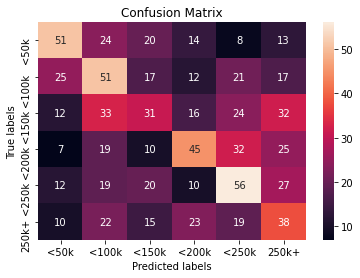

In [41]:
#create confusion matrix
confusion_matrix_limit_predicition = confusion_matrix(dep_var_non_default_cred_lim_brackets_test,pred_cred_lim_bracket)

#Plot as heatmap
ax= plt.subplot()
fig10 = sns.heatmap(confusion_matrix_limit_predicition, annot=True, fmt='g', ax=ax);  #annot=True to annotate cells, ftm='g' to disable scientific notation

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['<50k', '<100k', '<150k','<200k','<250k','250k+']); ax.yaxis.set_ticklabels(['<50k', '<100k', '<150k','<200k','<250k','250k+']);

The above confusion matrix shows the results of our model with the diagonal line from top left to right the number of correct predictions. The bottom left corner underneath the diagonal shows the number of customer with smaller predicted limits than their actual limits (this presents the higher risk customers), with the top right showing customers with smaller limits than their predicted.

### Decreasing credit limit for customers.

Here we will be implementing our credit limit predicting model on the (unused) default dataset to provide new credit limits for these customers. This model has been trained on the non-defaulting clients.

In [42]:
#Creating variables on our unseen dataset
indep_age_sex_edu_marriage_whole_dataset = credit_defaults_new_models[['AGE','SEX','EDUCATION', 'MARRIAGE']]
#Prediction on unseen data
pred_cred_lim_bracket_whole_dataset = model_cred_lim_bracket.predict(indep_age_sex_edu_marriage_whole_dataset)
#Adding the predictions onto our dataset to compare against real values
credit_defaults_new_models['Prediction'] = pred_cred_lim_bracket_whole_dataset

#formatting
credit_defaults_new_models['limits'] = credit_defaults_new_models['limits'].astype(int)
credit_defaults_new_models['Prediction'] = credit_defaults_new_models['Prediction'].astype(int)

#Column to see if the predcitions are lower than the real values
credit_defaults_new_models['Decrease credit limit'] = credit_defaults_new_models['Prediction'] < credit_defaults_new_models['limits']
#Dataframe for info of clients who should have their credit limit reduced, according to our model.
reduce_client_credit_limit = credit_defaults_new_models[credit_defaults_new_models['Decrease credit limit'] == True]

<ipython-input-42-b4164a080456>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  credit_defaults_new_models['Prediction'] = pred_cred_lim_bracket_whole_dataset
<ipython-input-42-b4164a080456>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  credit_defaults_new_models['limits'] = credit_defaults_new_models['limits'].astype(int)
<ipython-input-42-b4164a080456>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Below we have a list of 159 defaulting clients with credit limits higher than our model predicts. These clients should have their credit limit reduced to below our upper prediction bracket in order to reduce defaulting in the future.

In [43]:
reduce_client_credit_limit.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,default payment next month,Generation,limit,Repayment September,Repayment August,...,May consumption,June consumption,July consumption,August consumption,Average monthly consumption,Months to repayment,Payback possible,limits,Prediction,Decrease credit limit
13,70000,1,2,2,30,True,Millennial,"50,000 - 69,999",One month payment delay,Two month payment delay,...,33645.0,1919.0,1668.0,1633.0,7921.6,"Repayment less than consumption, need to reduc...",False,100000,50000,True
23,450000,0,1,1,40,True,Millennial,"360,000 - 1,000,000",No consumption,No consumption,...,560.0,1473.0,19420.0,5520.0,5394.6,"Repayment less than consumption, need to reduc...",False,1000000,200000,True
50,70000,1,3,2,42,True,Millennial,"50,000 - 69,999",One month payment delay,Two month payment delay,...,764.0,932.0,916.0,871.0,856.0,74.9838,False,100000,50000,True
60,500000,0,3,1,28,True,Millennial,"360,000 - 1,000,000",The use of revolving credit,The use of revolving credit,...,2110.0,4941.0,6060.0,726.0,2818.6,"Repayment less than consumption, need to reduc...",False,1000000,150000,True
71,320000,1,2,2,29,True,Millennial,"260,000 - 359,999",Two month payment delay,Two month payment delay,...,1115.0,1562.0,1562.0,1521.0,1388.2,63.9033,False,1000000,50000,True


### Is a customer going to default or not?

We can input an example to check whether our model thinks someone is likely to default or not.

SEX_dict = {'female': 0,
           'male':1}
EDUCATION_dict = {'other' : 0,
                  'graduate school' : 1,
                  'university' :2,
                  'high school' : 3}
MARRIAGE_dict = {'others' : 0,
                 'married' : 1,
                 'single' : 2,        
                 'divorce' : 3}

In [49]:
def default_prediction_model_4(age,credit_limit,education,marriage,sex):
    df_indep_vars = pd.DataFrame({'AGE':[age],
                                  'LIMIT_BAL':[credit_limit],
                                  'EDUCATION':[education],
                                  'MARRIAGE':[marriage],
                                 'SEX':[sex]})
    prediction_of_customer = model_4.predict(df_indep_vars)
    return print(prediction_of_customer)
        

In [51]:
print("Example 1: Is a customer who is; 61 years old, $100,000 credit limit, married, graduate school educated and female likely to default?.")
default_prediction_model_4(61,100000,1,1,0)

Example 1: Is a customer who is; 61 years old, $100,000 credit limit, married, graduate school educated and female likely to default?.
[ True]


### What should a customers maximum credit limit be?

In [46]:
def credit_limit_prediction_model(age,sex,education,marriage):
    df_indep_vars_lim = pd.DataFrame({'AGE':[age],
                                 'SEX':[sex],
                                 'EDUCATION': [education],
                                 'MARRIAGE': [marriage]})
    limit_prediction_of_customer = model_cred_lim_bracket.predict(df_indep_vars_lim)
    return print(limit_prediction_of_customer)
        

In [47]:
print("Example 2: What should the maximum credit limit be for a customer who is 31 years old, female, married, grad school educated?")
credit_limit_prediction_model(31,0,1,1)

Example 2: 31 years old, female, married, grad school.
[1000000]
